In [39]:
import pandas as pd

In [40]:
mos_data = pd.read_csv('./train.csv', sep=',', header=0)
mos_data = mos_data.dropna(axis=0)
mos_data

/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/1553548860.py:1: DtypeWarning: Columns (0,1,2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mos_data = pd.read_csv('./train.csv', sep=',', header=0)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,29/05/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.0,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9.0,1.0,0.0
1,29/05/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.0,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9.0,1.0,0.0
2,29/05/2007,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62.0,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9.0,1.0,0.0
3,29/05/2007,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,1.0,0.0
4,29/05/2007,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8447,26/09/2013,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51.0,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8.0,6.0,1.0
8448,26/09/2013,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58.0,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8.0,5.0,0.0
8449,26/09/2013,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17.0,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9.0,1.0,0.0
8450,26/09/2013,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71.0,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9.0,5.0,0.0


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Співвідношення між адресою і кількістю заражених комарів

mos_data_grouped_by_address = mos_data.groupby(by=['Address']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
)
mos_data_grouped_by_address


,NumMosquitos,WnvPresent
Address,,
"1000 East 67th Street, Chicago, IL 60637, USA",655.0,1.0
"1000 North Central Park Avenue, Chicago, IL 60651, USA",1684.0,1.0
"1000 South California Avenue, Chicago, IL 60612, USA",125.0,0.0
"1000 West 95th Street, Chicago, IL 60643, USA",185.0,1.0
"1100 North Artesian Avenue, Chicago, IL 60622, USA",370.0,1.0
...,...,...
"South Vincennes Avenue, Chicago, IL, USA",327.0,1.0
"South Wallace Street, Chicago, IL, USA",28.0,0.0
"University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA",1339.0,1.0


<AxesSubplot: xlabel='WnvPresent', ylabel='NumMosquitos'>

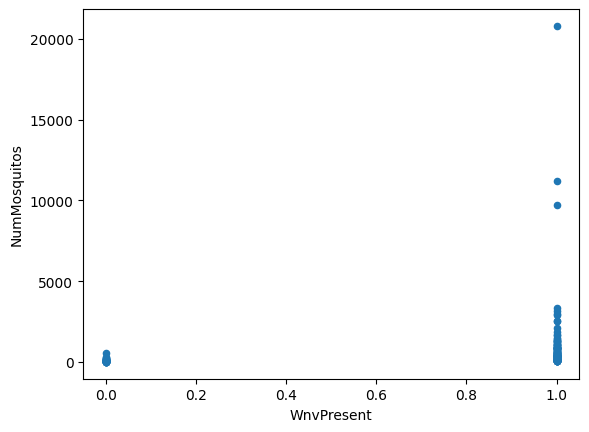

In [42]:
# 1.1 Візуалізація співвідношення кількості заражених комарів до незаражених

mos_data_grouped_by_address.plot.scatter(x='WnvPresent', y='NumMosquitos')

In [43]:
# 2. Співвідношення між видом і кількістю заражених комарів

mos_data_grouped_by_species = mos_data.groupby(by=['Species']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by='NumMosquitos')
mos_data_grouped_by_species


,NumMosquitos,WnvPresent
Species,,
CULEX TARSALIS,2.0,0.0
CULEX ERRATICUS,7.0,0.0
CULEX SALINARIUS,91.0,0.0
CULEX TERRITANS,380.0,0.0
CULEX RESTUANS,17363.0,1.0
CULEX PIPIENS,43335.0,1.0
CULEX PIPIENS/RESTUANS,55062.0,1.0


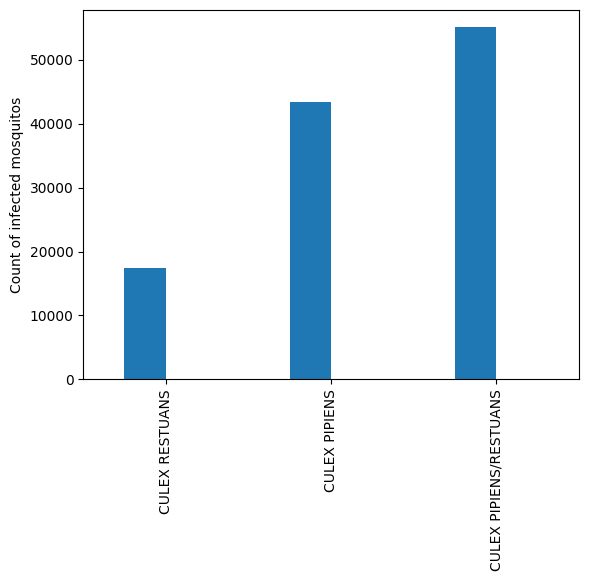

In [44]:
# 2.1. Візуалізація кількості заражених комарів

sp_plot = mos_data_grouped_by_species[mos_data_grouped_by_species['WnvPresent'] == 1].plot.bar()
plt.ylabel('Count of infected mosquitos')
sp_plot.set(xlabel=None)
sp_plot.legend().remove()

In [45]:
# Формуємо вибірку для візуалізації на карті

mos_data_grouped_map = mos_data.groupby(by=['Address']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).sort_values(by='NumMosquitos')
mos_data_grouped_map = mos_data_grouped_map[mos_data_grouped_map['WnvPresent'] == 1]
mos_data_grouped_map

,NumMosquitos,WnvPresent,Latitude,Longitude
Address,,,,
"6000 West Roscoe Street, Chicago, IL 60634, USA",50.0,1.0,41.942114,-87.776385
"4200 West 31st Street, Chicago, IL 60623, USA",52.0,1.0,41.837085,-87.729384
"4000 North Austin Avenue, Chicago, IL 60634, USA",58.0,1.0,41.953067,-87.776792
"6600 South Kilpatrick Avenue, Chicago, IL 60629, USA",61.0,1.0,41.772846,-87.740029
"6400 South Stony Island Avenue, Chicago, IL 60637, USA",61.0,1.0,41.778748,-87.586427
...,...,...,...,...
"2400 East 105th Street, Chicago, IL 60617, USA",3130.0,1.0,41.704572,-87.565666
"4100 North Oak Park Avenue, Chicago, IL 60634, USA",3350.0,1.0,41.954690,-87.800991
"South Stony Island Avenue, Chicago, IL, USA",9694.0,1.0,41.726465,-87.585413


In [46]:
# 3. Візуалізуємо локацї, де знайдено скупчення заражених комарів

import folium
from folium import plugins

vis = folium.Map(location=[mos_data_grouped_map['Latitude'][1], mos_data_grouped_map['Longitude'][1]], zoom_start=8)
locations = mos_data_grouped_map[['Latitude', 'Longitude']].values.tolist()

for point in range(0, len(locations)):
    folium.Circle(locations[point], popup=mos_data_grouped_map['NumMosquitos'][point]).add_to(vis)

heatData = mos_data_grouped_map.groupby(by=['Latitude', 'Longitude'])['NumMosquitos'].mean().reset_index().values.tolist()
folium.plugins.HeatMap(heatData).add_to(vis)

# Додаємо станції до карти
folium.Marker(location=[41.995,-87.933], popup= 'Station 1').add_to(vis)
folium.Marker(location=[41.786,-87.752], popup= 'Station 2').add_to(vis)
vis

In [47]:
# готуємо дані до обʼєднання з табличкою погода. Для цього нам потрібно зробити формат дати однаковим.
mos_data['Date'] = pd.to_datetime(mos_data['Date'], format='%d/%m/%Y')
mos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8452 entries, 0 to 8451
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8452 non-null   datetime64[ns]
 1   Address                 8452 non-null   object        
 2   Species                 8452 non-null   object        
 3   Block                   8452 non-null   float64       
 4   Street                  8452 non-null   object        
 5   Trap                    8452 non-null   object        
 6   AddressNumberAndStreet  8452 non-null   object        
 7   Latitude                8452 non-null   float64       
 8   Longitude               8452 non-null   float64       
 9   AddressAccuracy         8452 non-null   float64       
 10  NumMosquitos            8452 non-null   float64       
 11  WnvPresent              8452 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memo

In [48]:
# 5. Додаємо дані про погоду з таблички weather до нашої вибірки
mos_data_to_merge = mos_data[['Date', 'Address', 'Species', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent']]
mos_data_to_merge.loc['Date'] = pd.to_datetime(mos_data_to_merge['Date'], format='%Y/%m/%d')
mos_data_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8453 entries, 0 to Date
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8452 non-null   datetime64[ns]
 1   Address       8452 non-null   object        
 2   Species       8452 non-null   object        
 3   Latitude      8452 non-null   object        
 4   Longitude     8452 non-null   object        
 5   NumMosquitos  8452 non-null   object        
 6   WnvPresent    8452 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 528.3+ KB


/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/2997317458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mos_data_to_merge.loc['Date'] = pd.to_datetime(mos_data_to_merge['Date'], format='%Y/%m/%d')


In [49]:
weather = pd.read_csv('./weather.csv', sep=',', header=0)
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y/%m/%d')
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0,0,29.1,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0,0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0,0,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0,29.42,30.07,8.5,29,9
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0,0,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.1,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.2,22.6,34,22.9


In [50]:
merged_weather = mos_data_to_merge.join(weather.set_index('Date'), on='Date')
merged_weather.reset_index(drop=True, inplace=True)

merged_weather
merged_weather['WnvPresent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16905 entries, 0 to 16904
Series name: WnvPresent
Non-Null Count  Dtype 
--------------  ----- 
16904 non-null  object
dtypes: object(1)
memory usage: 132.2+ KB


In [51]:
merged_weather['Year'] = merged_weather['Date'].dt.year 
merged_weather['Month'] = merged_weather['Date'].dt.month
merged_weather

,Date,Address,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,1.0,0.0,1.0,88.0,60.0,...,M,0,0,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,1.0,0.0,2.0,88.0,65.0,...,M,M,0,29.44,30.09,5.8,16.0,7.4,2007.0,5.0
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.95469,-87.800991,1.0,0.0,1.0,88.0,60.0,...,M,0,0,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.95469,-87.800991,1.0,0.0,2.0,88.0,65.0,...,M,M,0,29.44,30.09,5.8,16.0,7.4,2007.0,5.0
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,41.994991,-87.769279,1.0,0.0,1.0,88.0,60.0,...,M,0,0,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16900,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5.0,0.0,1.0,75.0,50.0,...,M,0,0,29.34,30.04,3.8,8.0,4.2,2013.0,9.0
16901,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5.0,0.0,2.0,75.0,55.0,...,M,M,0,29.4,30.04,4.1,9.0,4.6,2013.0,9.0
16902,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,41.776428,-87.627096,1.0,0.0,1.0,75.0,50.0,...,M,0,0,29.34,30.04,3.8,8.0,4.2,2013.0,9.0
16903,2013-09-26,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX PIPIENS/RESTUANS,41.776428,-87.627096,1.0,0.0,2.0,75.0,55.0,...,M,M,0,29.4,30.04,4.1,9.0,4.6,2013.0,9.0


In [52]:
merged_weather_by_temp = merged_weather.groupby(['Year', 'Month']).agg(
    Tmax=('Tmax', 'max'),
    Tmin=('Tmin', 'min'),
    PrecipTotal=('PrecipTotal', 'max'),
    AvgSpeed=('AvgSpeed', 'max'),
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by='Year')
merged_weather_by_temp


Tmax  Tmin PrecipTotal AvgSpeed NumMosquitos  WnvPresent
Year   Month                                                          
2007.0 5.0    88.0  60.0           0      7.4         80.0         0.0
       6.0    92.0  47.0           M      8.3        856.0         0.0
       7.0    85.0  53.0        1.55      8.5      14398.0         1.0
       8.0    92.0  60.0        1.31      9.5      80030.0         1.0
       9.0    91.0  46.0        0.27      9.7      18600.0         1.0
       10.0   83.0  49.0           0      5.9       3412.0         1.0
2009.0 5.0    64.0  54.0           0      8.3        380.0         0.0
       6.0    89.0  43.0        3.97      9.2      14780.0         0.0
       7.0    86.0  57.0        0.19      9.8      17666.0         1.0
       8.0    86.0  59.0        1.19      9.7       4692.0         1.0
       9.0    84.0  50.0        0.16      7.3       4274.0         1.0
       10.0   59.0  41.0        0.89      9.5        424.0         0.0
2013.0 6.0    91.0  52.0        0.92      9.9       9422.0         1.0
       7.0    97.0  57.0        0.84      8.4      25542.0         1.0
       8.0    89.0  55.0        0.36      9.3      25414.0         1.0
       9.0    86.0  50.0        0.84      9.8      12510.0         1.0

<AxesSubplot: xlabel='Year,Month'>

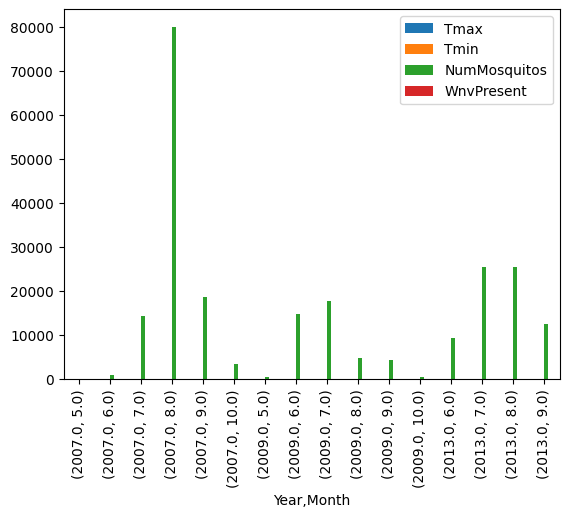

In [53]:
merged_weather_by_temp.plot.bar()

In [54]:
cols = merged_weather.columns
cols

Index(['Date', 'Address', 'Species', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Year', 'Month'],
      dtype='object')

In [55]:
merged_weather_by_code = merged_weather.groupby(['CodeSum']).agg(
    Tmax=('Tmax', 'max'),
    Tmin=('Tmin', 'min'),
    PrecipTotal=('PrecipTotal', 'max'),
    Water1=('Water1', 'max'),
    Depth=('Depth', 'max'),
    Cool=('Cool', 'max'),
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by=('NumMosquitos'))
merged_weather_by_code


,Tmax,Tmin,PrecipTotal,Water1,Depth,Cool,NumMosquitos,WnvPresent
CodeSum,,,,,,,,
TSRA BR HZ VCTS,92.0,70.0,0.16,M,0,16,216.0,0.0
TS RA,85.0,63.0,0.27,M,0,9,333.0,0.0
TSRA BR HZ,85.0,73.0,0.46,M,M,14,507.0,1.0
DZ BR,83.0,63.0,0.16,M,0,8,687.0,0.0
TS TSRA BR,86.0,65.0,3.97,M,0,11,701.0,0.0
TSRA RA BR VCTS,85.0,69.0,1.55,M,0,12,853.0,1.0
TS TSRA RA BR HZ VCTS,85.0,69.0,0.92,M,M,12,853.0,1.0
TS TSRA RA FG BR HZ,84.0,69.0,0.84,M,0,12,1030.0,1.0
RA DZ BR,70.0,60.0,0.16,M,M,0,1404.0,1.0


<AxesSubplot: xlabel='CodeSum'>

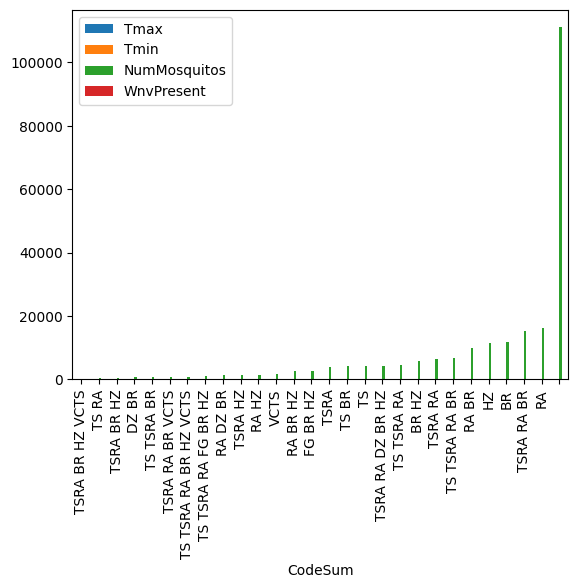

In [56]:
merged_weather_by_code.plot.bar()

In [57]:
merged_weather_by_station = merged_weather.groupby(['Station']).agg(
    Tmax=('Tmax', 'max'),
    Tmin=('Tmin', 'min'),
    PrecipTotal=('PrecipTotal', 'max'),
    Water1=('Water1', 'max'),
    Depth=('Depth', 'max'),
    NumMosquitos=('NumMosquitos', 'count'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by='NumMosquitos')
merged_weather_by_station

,Tmax,Tmin,PrecipTotal,Water1,Depth,NumMosquitos,WnvPresent
Station,,,,,,,
1.0,96.0,41.0,3.97,M,0,8452,1.0
2.0,97.0,44.0,M,M,M,8452,1.0


In [58]:
spray_data = pd.read_csv('./spray.csv', sep=',', header=0)
spray_data = spray_data.dropna(axis=0)
spray_data

,Date,Time,Latitude,Longitude
0,2011-08-29,18:56:58,42.391623,-88.089163
1,2011-08-29,18:57:08,42.391348,-88.089163
2,2011-08-29,18:57:18,42.391022,-88.089157
3,2011-08-29,18:57:28,42.390637,-88.089158
4,2011-08-29,18:57:38,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,20:34:11,42.006587,-87.812355
14831,2013-09-05,20:35:01,42.006192,-87.816015
14832,2013-09-05,20:35:21,42.006022,-87.817392
14833,2013-09-05,20:35:31,42.005453,-87.817423


In [59]:
# готуємо дані до обʼєднання з попередньою табличкою погодних даних. Для цього нам потрібно зробити формат дати однаковим.
spray_data['Date'] = pd.to_datetime(spray_data['Date'], format='%Y/%m/%d')
spray_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14251 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14251 non-null  float64       
 3   Longitude  14251 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 556.7+ KB


In [60]:
merged_weather_with_spray = merged_weather.merge(spray_data[['Date', 'Longitude', 'Latitude']], on='Date', suffixes=[None, 'Spray'])
merged_weather_with_spray.reset_index(drop=True, inplace=True)
merged_weather_with_spray.head()

,Date,Address,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,LongitudeSpray,LatitudeSpray
0,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739783,41.960520
1,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739787,41.960515
2,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739787,41.960508
3,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739792,41.960498
4,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739800,41.960527


In [61]:
merged_weather_with_spray[merged_weather_with_spray['Date'].dt.year == 2013]

,Date,Address,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,LongitudeSpray,LatitudeSpray
0,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739783,41.960520
1,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739787,41.960515
2,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739787,41.960508
3,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739792,41.960498
4,2013-07-25,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.95469,-87.800991,3.0,0.0,1.0,81.0,57.0,...,0,29.33,30.05,4.1,23.0,5.1,2013.0,7.0,-87.739800,41.960527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950509,2013-08-29,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,41.925652,-87.63359,1.0,0.0,2.0,87.0,69.0,...,0,29.36,30,4.2,10.0,4.6,2013.0,8.0,-87.684137,41.980493
2950510,2013-08-29,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,41.925652,-87.63359,1.0,0.0,2.0,87.0,69.0,...,0,29.36,30,4.2,10.0,4.6,2013.0,8.0,-87.684428,41.980085
2950511,2013-08-29,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,41.925652,-87.63359,1.0,0.0,2.0,87.0,69.0,...,0,29.36,30,4.2,10.0,4.6,2013.0,8.0,-87.685138,41.980050
2950512,2013-08-29,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX PIPIENS/RESTUANS,41.925652,-87.63359,1.0,0.0,2.0,87.0,69.0,...,0,29.36,30,4.2,10.0,4.6,2013.0,8.0,-87.685593,41.979912


In [62]:
merged_weather_with_spray_loс = merged_weather_with_spray.groupby(['Date']).agg(
    Longitude=('Longitude', 'mean'),
    Latitude=('Latitude', 'mean'),
    LongitudeSpray=('LongitudeSpray', 'mean'),
    LatitudeSpray=('LatitudeSpray', 'mean'),
    NumMosquitos=('NumMosquitos', 'count'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by='NumMosquitos')
merged_weather_with_spray_loс

,Longitude,Latitude,LongitudeSpray,LatitudeSpray,NumMosquitos,WnvPresent
Date,,,,,,
2013-08-08,-87.701662,41.841233,-87.697035,41.931466,432590,1.0
2013-07-25,-87.717382,41.860285,-87.722879,41.954535,491742,1.0
2013-08-22,-87.709359,41.855252,-87.666029,41.814052,530058,1.0
2013-08-29,-87.730881,41.878329,-87.703237,41.860128,658372,1.0
2013-08-15,-87.717981,41.873967,-87.783171,41.926007,837752,1.0


/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/3889469874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(merged_weather_with_spray[merged_weather_with_spray['WnvPresent'] == 1][merged_weather_with_spray['Year'] == 2013]['Longitude'], merged_weather_with_spray[merged_weather_with_spray['WnvPresent'] == 1][merged_weather_with_spray['Year'] == 2013]['Latitude'])


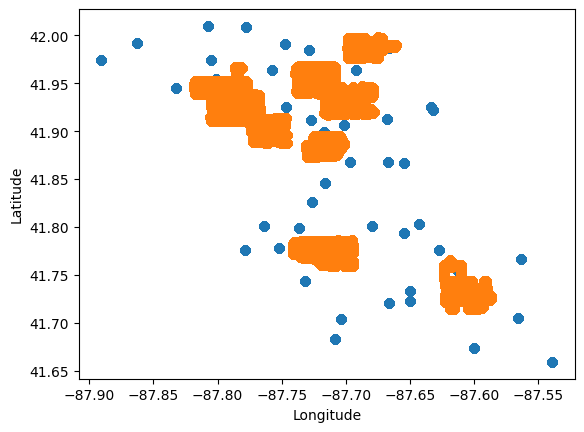

In [63]:

# відображаємо довготу і широту пасток та місць розпилення спрею проти комарів для знаходження закономірностей
plt.scatter(merged_weather_with_spray[merged_weather_with_spray['WnvPresent'] == 1][merged_weather_with_spray['Year'] == 2013]['Longitude'], merged_weather_with_spray[merged_weather_with_spray['WnvPresent'] == 1][merged_weather_with_spray['Year'] == 2013]['Latitude'])
plt.scatter(merged_weather_with_spray['LongitudeSpray'], merged_weather_with_spray['LatitudeSpray'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Ми бачимо, що розпилення проводилось 7 і 8 місяця 2013 року, що є кінцевими датами нашої вибірки і не має значного впливу на заразність комарів. Точки розпилення рівномірно розподілені відносно пасток, значних скупчень не виявлено. Тому ми припускаємо, що дані про розпилення не потрібно застосовувати для навчання моделі.

In [64]:
# Готуємо моделі для навчання
# створюємо список моделей 
modelsList = { }

In [86]:
# ініціалізація Logistic Regression моделі 
from sklearn.linear_model import LogisticRegression


logRegMdl = LogisticRegression( 
    penalty='elasticnet',  # тип регуляризації
    solver='saga',  # для роботи з цим типом регуляризації необхідно спеціальний алгоритм пошуку параметрів
    l1_ratio=0.5,  # частка L1 регуляризації (параметр alpha з формули вище)
    max_iter=10000  # для пошуку рішення у такому формулюванні зазвичай потрібно більше ітерацій)
)
# додаємо модель до списку
modelsList['Logistic Regression'] = logRegMdl

In [66]:
# ініціалізація SVM моделі 
from sklearn.svm import SVC

svc = SVC(
    C=1.,  # значення константи регулярізації з формули вище: чим більше, тим слабше регулярізація
    kernel='rbf'
    )

# додаємо модель до списку
modelsList['Support Vector Machine'] = svc

In [67]:
# ініціалізація k-mean моделі 
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2,  # кількість кластерів
    n_init=10,  # кількість спроб ініціалізації
    random_state=42  # фіксація випадкового стану
)

# додаємо модель до списку
modelsList['K-mean'] = km

In [68]:
# ініціалізація k-NBC моделі
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# додаємо модель до списку
modelsList['Naive Bayes Classifier'] = gnb

In [69]:
# ініціалізація Decision Tree моделі
from sklearn.tree import DecisionTreeClassifier

treeMdl = DecisionTreeClassifier(
    criterion='gini',  # критерій розбивки gini дає кращі результати ніж entropy
    splitter='random',
    max_depth=2,  # максимальна кількість розбиттів (глибина дерева)
    min_samples_split=2,  # мінімальна кількість спостережень, щоб зробити розбиття
    min_samples_leaf=2,  # мінімальна кількість спостережень, щоб сформувати лист дерева
    max_features=2
)

modelsList['Decision Tree'] = treeMdl

In [70]:
# ініціалізація Random Forest моделі
from sklearn.ensemble import RandomForestClassifier

forestMdl = RandomForestClassifier(
    n_estimators = 80, # кількість дерев, які потрібно побудувати
    criterion='gini', # критерій побудови: підвищення однорідності у листі дерева
    max_depth=3, # максимальна глибина дерева
    min_samples_split=10, # мінімальна кількість спостережень, щоб зробити розбивку даних на 2 підгрупи
    min_samples_leaf=2, # мінімальна кількість спостережень, яка може сформувати лист дерева
    max_features=0.8, # максимальна кількість змінних, якими можна скористатися в одному дереві
    bootstrap=True, # чи будувати кожне дерево на вибірці з оригінальних даних
    max_samples=0.8, # частка даних, яка може бути використана в побудові одного дерева
    random_state=42 # фіксація випадкового стану
)

modelsList['Random Forest'] = forestMdl

In [71]:
merged_weather.dropna(axis=0)
merged_weather.drop(merged_weather.tail(2).index, axis=0, inplace=True)
print(merged_weather.shape)

(16903, 30)


In [72]:
merged_weather.replace(' ', np.nan, inplace=True)
merged_weather.dropna(axis=0, inplace=True)
merged_weather.iloc[-1, :]

Date                                      2013-09-26 00:00:00
Address         4200 West 65th Street, Chicago, IL 60621, USA
Species                                CULEX PIPIENS/RESTUANS
Latitude                                            41.776428
Longitude                                          -87.627096
NumMosquitos                                              1.0
WnvPresent                                                0.0
Station                                                   1.0
Tmax                                                     75.0
Tmin                                                     50.0
Tavg                                                       63
Depart                                                      3
DewPoint                                                 52.0
WetBulb                                                    58
Heat                                                        2
Cool                                                        0
Sunrise 

In [73]:
from sklearn.model_selection import KFold

X = merged_weather.loc[:, 
((merged_weather.columns != 'Date') 
& (merged_weather.columns != 'PrecipTotal')
& (merged_weather.columns != 'Depart')
& (merged_weather.columns != 'Depth')
& (merged_weather.columns != 'Water1')
& (merged_weather.columns != 'SnowFall')
& (merged_weather.columns != 'Cool')
& (merged_weather.columns != 'Sunrise')
& (merged_weather.columns != 'Sunset')
& (merged_weather.columns != 'Heat'))]

y = merged_weather['WnvPresent'].values

X.iloc[:50, :20]
print(f'X shape:', X.shape)
print(f'y shape:', y.shape)

X shape: (8561, 20)
y shape: (8561,)


In [74]:
X

,Address,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,CodeSum,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1.0,0.0,1.0,88.0,60.0,74,58.0,65,BR HZ,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1.0,0.0,2.0,88.0,65.0,77,59.0,66,BR HZ,29.44,30.09,5.8,16.0,7.4,2007.0,5.0
2,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.954690,-87.800991,1.0,0.0,1.0,88.0,60.0,74,58.0,65,BR HZ,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
3,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.954690,-87.800991,1.0,0.0,2.0,88.0,65.0,77,59.0,66,BR HZ,29.44,30.09,5.8,16.0,7.4,2007.0,5.0
4,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,41.994991,-87.769279,1.0,0.0,1.0,88.0,60.0,74,58.0,65,BR HZ,29.39,30.11,5.8,18.0,6.5,2007.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16894,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,41.763733,-87.742302,6.0,1.0,1.0,75.0,50.0,63,52.0,58,BR,29.34,30.04,3.8,8.0,4.2,2013.0,9.0
16896,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,41.987280,-87.666066,5.0,0.0,1.0,75.0,50.0,63,52.0,58,BR,29.34,30.04,3.8,8.0,4.2,2013.0,9.0
16898,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,41.912563,-87.668055,1.0,0.0,1.0,75.0,50.0,63,52.0,58,BR,29.34,30.04,3.8,8.0,4.2,2013.0,9.0
16900,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,42.009876,-87.807277,5.0,0.0,1.0,75.0,50.0,63,52.0,58,BR,29.34,30.04,3.8,8.0,4.2,2013.0,9.0


In [75]:
X.loc[:, 'SpeciesEncoded'] = X.groupby('Species')['NumMosquitos'].transform(np.mean)
X.loc[:, 'CodeSumEncoded'] = X.groupby('CodeSum')['NumMosquitos'].transform(np.mean)
X.loc[:, 'AddressEncoded'] = X.groupby('Address')['NumMosquitos'].transform(np.mean)

X = X.reset_index(drop=True)
merged_weather_encoded = X.loc[:, 'CodeSumEncoded'] = X.dropna()

merged_weather_encoded
X[['Species', 'SpeciesEncoded', 'CodeSum', 'CodeSumEncoded', 'Address', 'AddressEncoded']].head()

X.drop(['Species', 'CodeSum', 'Address'], axis=1, inplace=True)

/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/522187758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'SpeciesEncoded'] = X.groupby('Species')['NumMosquitos'].transform(np.mean)
/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/522187758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'CodeSumEncoded'] = X.groupby('CodeSum')['NumMosquitos'].transform(np.mean)
/var/folders/g2/jdj1wm7n7lqg0315d1ylkc7xw_5p47/T/ipykernel_14417/522187758.py:3: Setting

In [76]:
X

,Latitude,Longitude,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,SpeciesEncoded,CodeSumEncoded,AddressEncoded
0,41.954690,-87.800991,1.0,0.0,1.0,88.0,60.0,74,58.0,65,29.39,30.11,5.8,18.0,6.5,2007.0,5.0,14.837754,10.312950,20.280822
1,41.954690,-87.800991,1.0,0.0,2.0,88.0,65.0,77,59.0,66,29.44,30.09,5.8,16.0,7.4,2007.0,5.0,14.837754,10.312950,20.280822
2,41.954690,-87.800991,1.0,0.0,1.0,88.0,60.0,74,58.0,65,29.39,30.11,5.8,18.0,6.5,2007.0,5.0,8.383173,10.312950,20.280822
3,41.954690,-87.800991,1.0,0.0,2.0,88.0,65.0,77,59.0,66,29.44,30.09,5.8,16.0,7.4,2007.0,5.0,8.383173,10.312950,20.280822
4,41.994991,-87.769279,1.0,0.0,1.0,88.0,60.0,74,58.0,65,29.39,30.11,5.8,18.0,6.5,2007.0,5.0,8.383173,10.312950,2.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,41.763733,-87.742302,6.0,1.0,1.0,75.0,50.0,63,52.0,58,29.34,30.04,3.8,8.0,4.2,2013.0,9.0,14.837754,20.395869,5.500000
8557,41.987280,-87.666066,5.0,0.0,1.0,75.0,50.0,63,52.0,58,29.34,30.04,3.8,8.0,4.2,2013.0,9.0,14.837754,20.395869,14.566667
8558,41.912563,-87.668055,1.0,0.0,1.0,75.0,50.0,63,52.0,58,29.34,30.04,3.8,8.0,4.2,2013.0,9.0,14.837754,20.395869,9.375000
8559,42.009876,-87.807277,5.0,0.0,1.0,75.0,50.0,63,52.0,58,29.34,30.04,3.8,8.0,4.2,2013.0,9.0,14.837754,20.395869,22.090909


In [77]:
from sklearn.inspection import permutation_importance
def calculate_importance(mdl, X_test, y_test):
  test_res = [], [], []
  importances = permutation_importance(
    mdl, X_test, y_test,  # модель та дані, на яких оцінювати важливість
    n_repeats=10,  # скільки разів повторити перемішування та оцінку важливості
    random_state=42  # фіксація випадкового стану
    )
    
  for i, column in enumerate(X_test.columns):    
    # вивести на екран ім'я змінної, середнє значення та стандартне відхилення важливості змінної
    print(column, importances.importances_mean[i], importances.importances_std[i])

In [78]:
# отримуємо відсоток хибнопозитивних та хибнонегативних прикладів для різних порогових значень
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import auc, roc_curve

def get_roc_curve(y_test, test_preds):
  test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)

  # обчислимо значення AUC для тестового наборів
  test_auc = np.round(auc(test_fpr, test_tpr), 4)

  # побудуємо графік RUC кривою для обох наборів даних
  plt.plot(test_fpr, test_tpr, label=f'AUC на тестовому наборі: {test_auc}')
  plt.legend()  # додамо легенду, щоб відобразилися значення параметрів "label" у кожному графіку
  plt.show()

In [79]:
# ініціалізуємо об'єкт класу, яким користуватимемося для розбивки даних
kf = KFold(
    n_splits=5,  # кількість окремих тестових наборів
    shuffle=True,  # чи перемішувати дані перед тим, як розділити на окремі фрагменти
    random_state=42  # фіксація випадкового стану
)
def train_and_evaluate(models: dict):
  for modelName, model in models.items():
    # отримаємо індекси навчального та тестового набору
    for train_idx, test_idx in kf.split(X, y):
      # виберемо поточну навчальну та тестову групи
      X_train, y_train = X.iloc[train_idx], y[train_idx]
      X_test, y_test = X.iloc[test_idx], y[test_idx]  
      
      # навчимо модель
      modelFit = model.fit(X_train, y_train)
      
      # виберемо прогнози
      y_test_preds = model.predict(X_test)
     
      # порахуємо середнє значення та збережемо у список 
      y_test_r = np.round(y_test)
      y_test_pred_r = np.round(y_test_preds)
    
    # виведемо прогнози для заданого значення
    print(f'Площа ROC кривої тестового набору моделі {modelName}')
    get_roc_curve(y_test_r, y_test_pred_r)
    calculate_importance(modelFit, X_test, y_test)

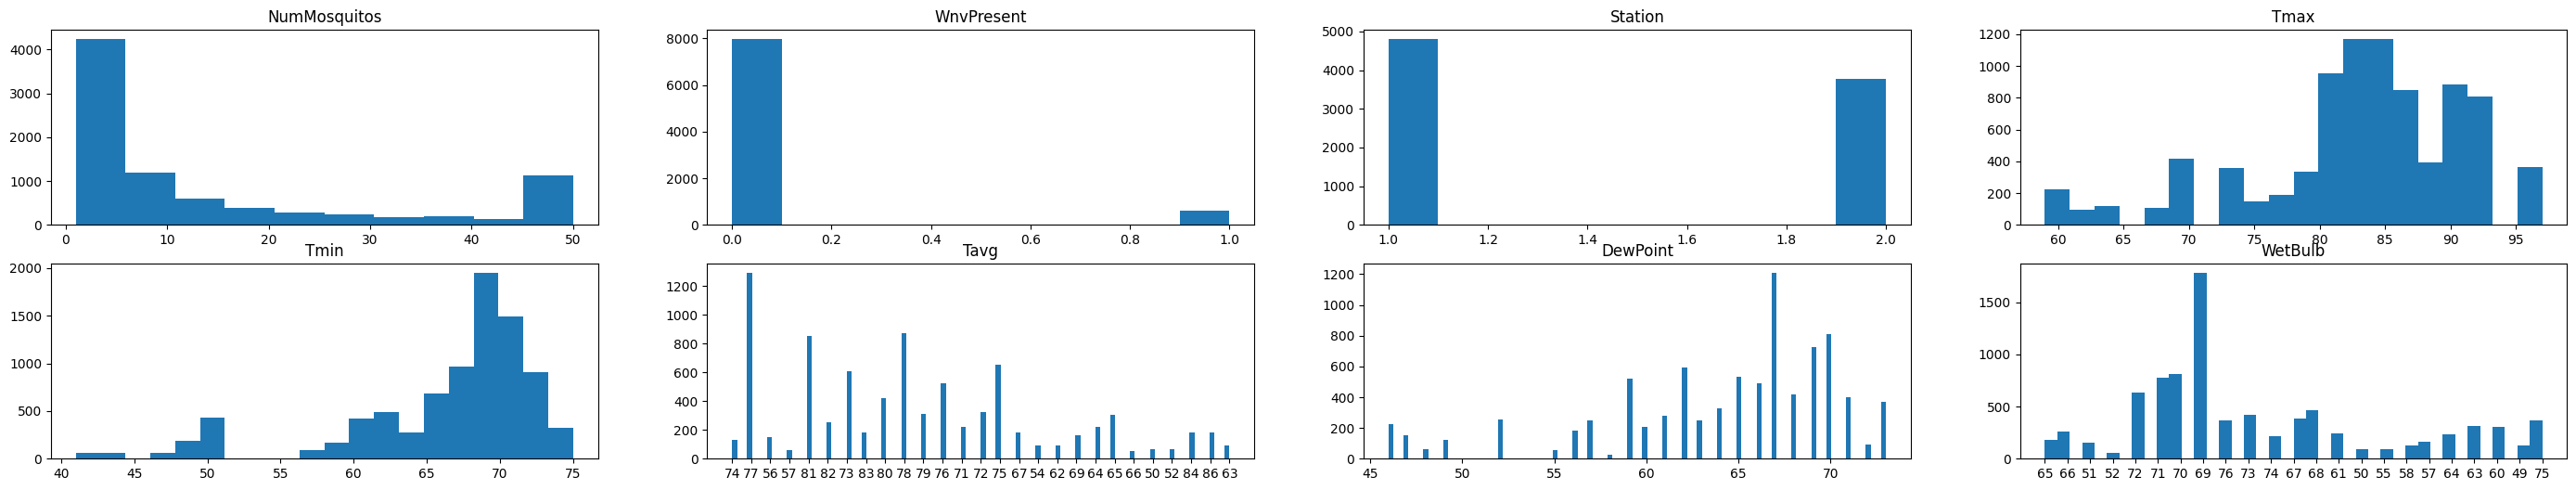

In [80]:
plt.figure(figsize=(35, 6))

plt.subplot(241)
plt.hist(X['NumMosquitos'])
plt.title('NumMosquitos')

plt.subplot(242)
plt.hist(X['WnvPresent'])
plt.title('WnvPresent')

plt.subplot(243)
plt.hist(X['Station'])
plt.title('Station')

plt.subplot(244)
plt.hist(X['Tmax'], bins=20)
plt.title('Tmax')

plt.subplot(245)
plt.hist(X['Tmin'], bins=20)
plt.title('Tmin')

plt.subplot(246)
plt.hist(X['Tavg'], bins=100)
plt.title('Tavg')

plt.subplot(247)
plt.hist(X['DewPoint'], bins=100)
plt.title('DewPoint')

plt.subplot(248)
plt.hist(X['WetBulb'], bins=40)
plt.title('WetBulb')

plt.show()

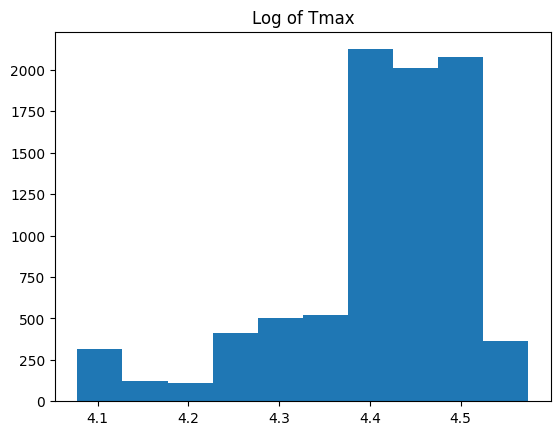

In [81]:
plt.hist(np.log(X['Tmax']))
plt.title('Log of Tmax')
plt.show()

X['Tmax'] = np.log(X['Tmax'])


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=54)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

In [83]:
modelsList

{'Logistic Regression': LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                    solver='saga'),
 'Support Vector Machine': SVC(),
 'K-mean': KMeans(n_clusters=2, random_state=42),
 'Naive Bayes Classifier': GaussianNB(),
 'Decision Tree': DecisionTreeClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                        splitter='random'),
 'Random Forest': RandomForestClassifier(max_depth=3, max_features=0.8, max_samples=0.8,
                        min_samples_leaf=2, min_samples_split=10,
                        n_estimators=80, random_state=42)}

Площа ROC кривої тестового набору моделі Logistic Regression


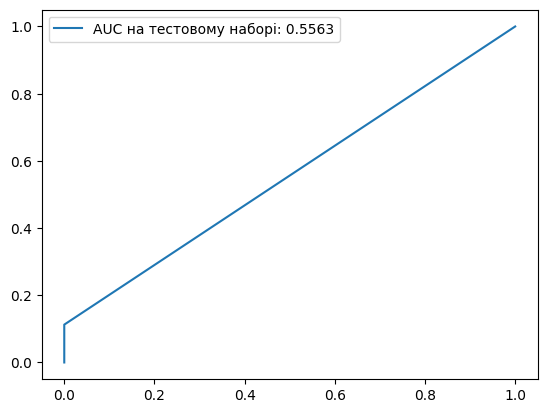

Latitude 0.0 0.0
Longitude 0.0 0.0
NumMosquitos 0.0008761682242990121 0.001833219021784483
WnvPresent 0.009813084112149484 0.001377316135812088
Station 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0020443925233644355 0.0010530231528808375
Tavg -0.004030373831775735 0.0027823610663118238
DewPoint 0.0025116822429906206 0.0013332607722562335
WetBulb 0.0009345794392523032 0.0007923282690566621
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.000992990654205561 0.0010786323196623252
ResultDir -0.0011098130841121988 0.0011812937158969979
AvgSpeed -0.00035046728971966924 0.0012582160764333021
Year 0.00017523364485980686 0.00026767381395769146
Month -0.0004088785046729382 0.001226635514018698
SpeciesEncoded 0.00303738317757003 0.0009345794392523462
CodeSumEncoded 0.001226635514018648 0.00048519999199286097
AddressEncoded -0.011331775700934622 0.0007923282690566621
Площа ROC кривої тестового набору моделі Support Vector Machine


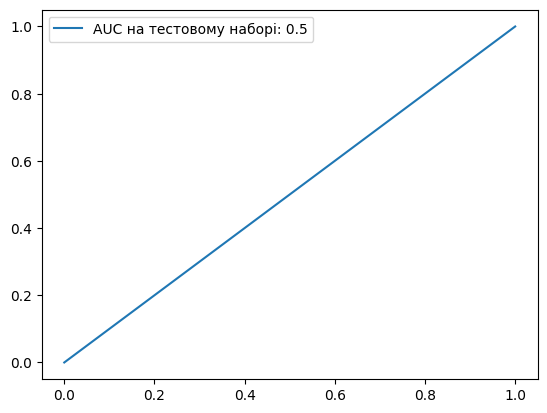

Latitude 0.0 0.0
Longitude 0.0 0.0
NumMosquitos 0.0 0.0
WnvPresent 0.0 0.0
Station 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0 0.0
Tavg 0.0 0.0
DewPoint 0.0 0.0
WetBulb 0.0 0.0
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.0 0.0
ResultDir 0.0 0.0
AvgSpeed 0.0 0.0
Year 0.0 0.0
Month 0.0 0.0
SpeciesEncoded 0.0 0.0
CodeSumEncoded 0.0 0.0
AddressEncoded 0.0 0.0
Площа ROC кривої тестового набору моделі K-mean


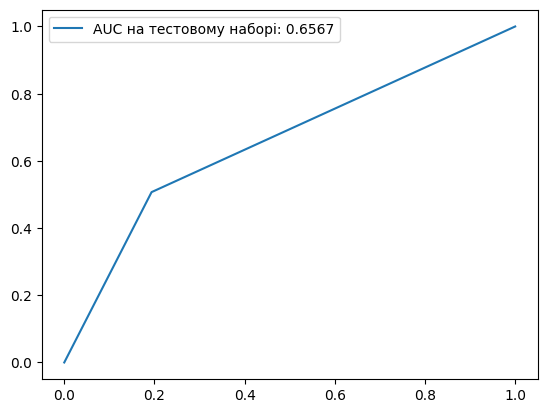

Latitude 2.4611362912575716 0.24889204430139464
Longitude 0.2848306105006486 0.057197082000950125
NumMosquitos 194282.20476555388 9179.67409791115
WnvPresent 8.678799501992762 0.9492041168584815
Station 0.004582486650906503 0.03142146926544594
Tmax 1.0991068026050925 0.13432778265999645
Tmin 6497.103509258572 552.2574540157433
Tavg 6420.500046193413 592.9698582434304
DewPoint 4911.246176096762 430.6719315799906
WetBulb 5008.517095530848 410.50429099841534
StnPressure 0.1322603264125064 0.07538002606820668
SeaLevel 0.28643033703556287 0.09316581813638146
ResultSpeed 48.15389097355073 15.63931943369388
ResultDir 3553.2840661800933 601.8417436108666
AvgSpeed 2.554943498771172 5.7705745698627116
Year 30.13980432630051 26.395111095961077
Month 0.6594555128947832 1.0927864876348932
SpeciesEncoded 2412.728178407496 280.49540777750866
CodeSumEncoded 24018.704305620726 1516.3413855403364
AddressEncoded 146387.53886684272 8435.613477850928
Площа ROC кривої тестового набору моделі Naive Bayes Cla

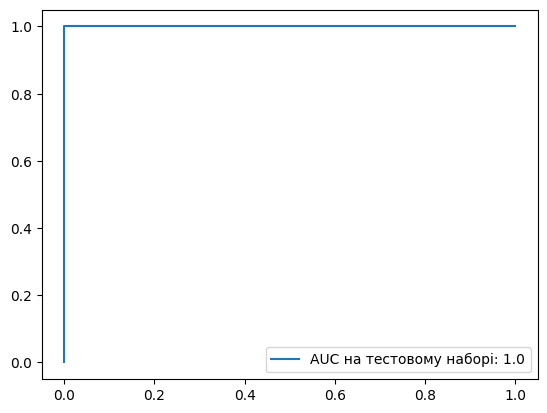

Latitude 0.0 0.0
Longitude 0.0 0.0
NumMosquitos 0.0 0.0
WnvPresent 0.15303738317757007 0.0013822616315653192
Station 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0 0.0
Tavg 0.0 0.0
DewPoint 0.0 0.0
WetBulb 0.0 0.0
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.0 0.0
ResultDir 0.0 0.0
AvgSpeed 0.0 0.0
Year 0.0 0.0
Month 0.0 0.0
SpeciesEncoded 0.0 0.0
CodeSumEncoded 0.0 0.0
AddressEncoded 0.0 0.0
Площа ROC кривої тестового набору моделі Decision Tree


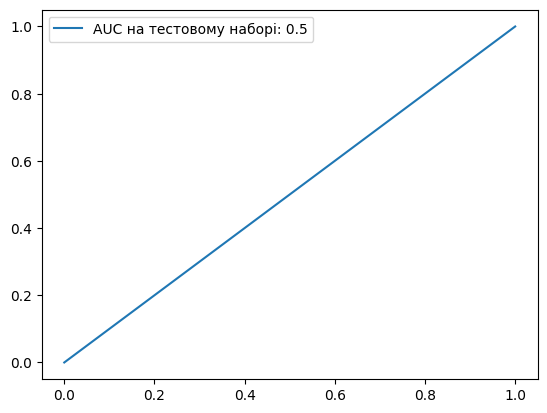

Latitude 0.0 0.0
Longitude 0.0 0.0
NumMosquitos 0.0 0.0
WnvPresent 0.0 0.0
Station 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0 0.0
Tavg 0.0 0.0
DewPoint 0.0 0.0
WetBulb 0.0 0.0
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.0 0.0
ResultDir 0.0 0.0
AvgSpeed 0.0 0.0
Year 0.0 0.0
Month 0.0 0.0
SpeciesEncoded 0.0 0.0
CodeSumEncoded 0.0 0.0
AddressEncoded 0.0 0.0
Площа ROC кривої тестового набору моделі Random Forest


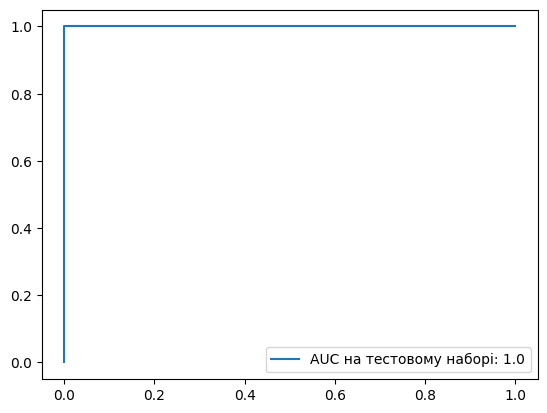

Latitude 0.0 0.0
Longitude 0.0 0.0
NumMosquitos 0.0 0.0
WnvPresent 0.15303738317757007 0.0013822616315653192
Station 0.0 0.0
Tmax 0.0 0.0
Tmin 0.0 0.0
Tavg 0.0 0.0
DewPoint 0.0 0.0
WetBulb 0.0 0.0
StnPressure 0.0 0.0
SeaLevel 0.0 0.0
ResultSpeed 0.0 0.0
ResultDir 0.0 0.0
AvgSpeed 0.0 0.0
Year 0.0 0.0
Month 0.0 0.0
SpeciesEncoded 0.0 0.0
CodeSumEncoded 0.0 0.0
AddressEncoded 0.0 0.0


In [87]:
# видаляємо показники з нульовою важливістю і ще раз тренуємо модель
train_and_evaluate(modelsList)

In [85]:
# видаляємо показники з нульовою важливістю і ще раз тренуємо модель
X = X.loc[:, 
((X.columns != 'SeaLevel') 
& (X.columns != 'ResultDir')
& (X.columns != 'Tmax')
& (X.columns != 'Tavg')
& (X.columns != 'Longitude')
& (X.columns != 'Latitude')
& (X.columns != 'ResultSpeed')
& (X.columns != 'Station')
& (X.columns != 'StnPressure')
)]

train_and_evaluate(modelsList)


NameError: name 'X_no_encode' is not defined

In [ ]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

model = Sequential()  # ініціалізація порожньої моделі

# додамо один персептрон у модель
model.add(Dense(
    units=1,  # кількість перцептронів
    activation='sigmoid'  # функція активації: перетворення на виході моделі
))

model.compile(
    optimizer=SGD(learning_rate=0.05),  # алгоритм оптимізації та швидкість навчання
    loss='categorical_crossentropy',
    metrics=['accuracy']  # додаткова метрика якості моделі
)

history = model.fit(
    x=X_train, 
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=3,
    epochs=10,
)


: 

: 

In [ ]:
def plot_model_history(hist):
    train_loss, test_loss = hist.history['loss'], hist.history['val_loss']
    x = np.arange(len(train_loss))
    plt.plot(x, train_loss, label='Train loss')
    plt.plot(x, test_loss, label='Test loss')
    plt.legend()
    plt.show()
    
plot_model_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
probability_model = tf.keras.Sequential(
    [model, tf.keras.layers.Softmax()]
)
predictions = probability_model.predict(X_test)

In [ ]:
predictions[0]

In [ ]:
from tensorflow import regularizers

np.random.seed(1)
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(units=3, activation='relu'))

# На виході моделі ми хочемо отримати вектор, що є розподілом ймовірностей для 3х класів.
# Це означає, що кількість нейронів має бути 3 і нам необхідно підібрати таку функцію активації, щоб
# розподіл вважалося допустимим (всі елементи були невід'ємними та у сумі давали 1). Хорошим кандидатом
#у такому разі є функція softmax
model.add(Dense(units=1, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=5,
    epochs=100,
    validation_data=(X_test, y_test)
)

: 

: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
plot_model_history(history)

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier

fig, ax = plt.subplots()
mlp = MLPClassifier(solver='lbfgs', random_state=32).fit(X_train, y_train)
plot_decision_regions(X_test.to_numpy(), y_test.astype(int), clf=mlp)

Робимо висновок, що категоріальна кросентропія дає значно гіршу точність результатів - 0.07005254179239273, ніж бінарна кросентропія - 0.9299474358558655.
Також функція втрат є нульовою.

In [ ]:
probability_model = tf.keras.Sequential(
    [model, tf.keras.layers.Softmax()]
)
predictions = probability_model.predict(X_test)